# importing Neccesary Libraries 

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
import warnings
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten,Dropout,SimpleRNN,LSTM,Input,Reshape
warnings.filterwarnings("ignore")

# Loading the dataset

In [2]:
data=pd.read_csv('heart_dataset.csv')
data2=data

# Data Analysis

In [3]:
data.head(5)



,age,sex,cp,tresbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   age      303 non-null    int64  
 1   sex      303 non-null    int64  
 2   cp       303 non-null    int64  
 3   tresbps  303 non-null    int64  
 4   chol     303 non-null    int64  
 5   fbs      303 non-null    int64  
 6   restecg  303 non-null    int64  
 7   thalach  303 non-null    int64  
 8   exang    303 non-null    int64  
 9   oldpeak  303 non-null    float64
 10  slope    303 non-null    int64  
 11  ca       303 non-null    int64  
 12  thal     303 non-null    int64  
 13  output   303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [5]:
data.corr()

,age,sex,cp,tresbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,output
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.306146,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.111921,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.202568,-0.161736,0.433798
tresbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.102163,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.090746,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.151028,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.090340,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.234810,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.132526,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.246335,0.210244,-0.430696


In [6]:
data.describe()

,age,sex,cp,tresbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.712871,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,0.979965,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [7]:

data['output'].value_counts()

1    165
0    138
Name: output, dtype: int64

# performing visualization of the dataset

<AxesSubplot:xlabel='tresbps', ylabel='count'>

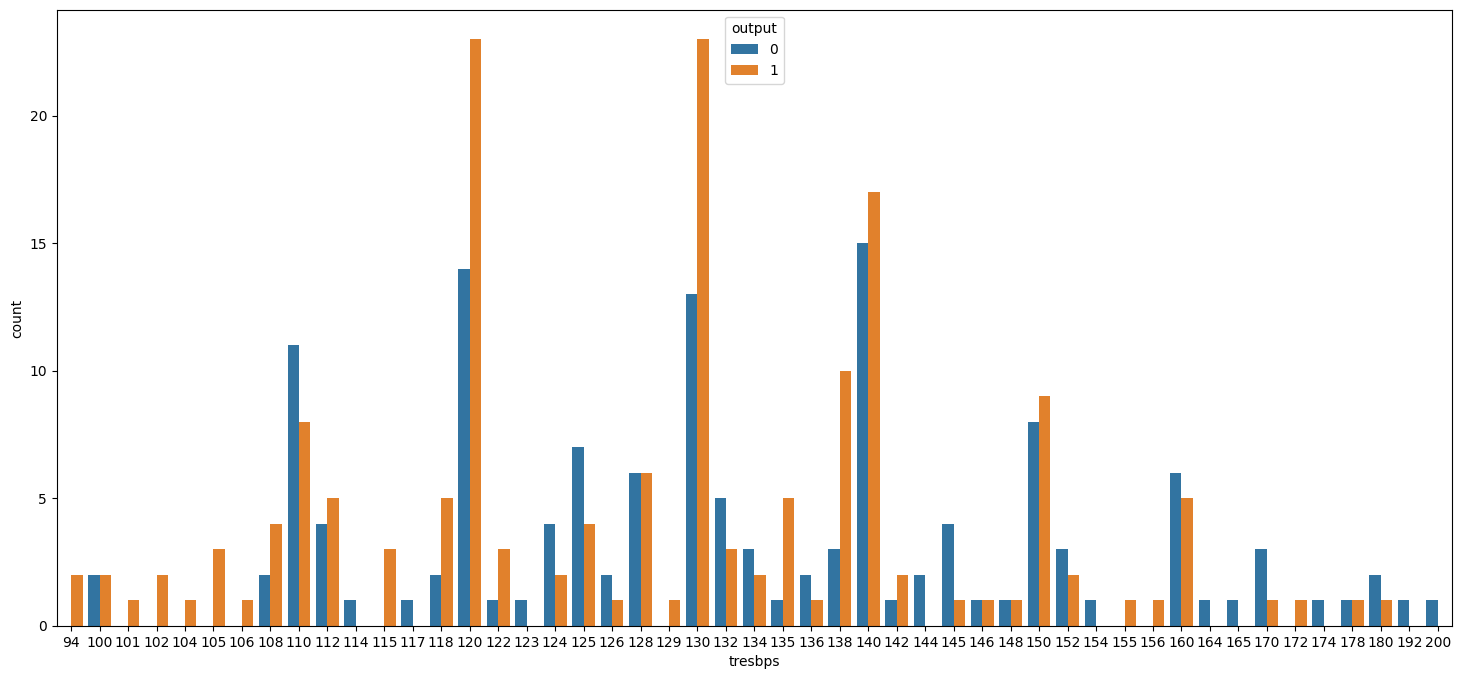

In [8]:
plt.figure(figsize=(18,8))
sns.countplot('tresbps',hue='output',data=data)

<Figure size 1200x1200 with 0 Axes>

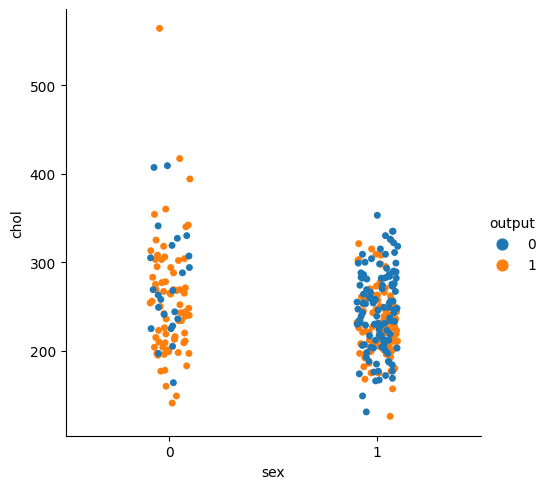

In [9]:
plt.figure(figsize=(12,12))
sns.catplot(x='sex',y='chol',hue='output',data=data,kind='strip')

<AxesSubplot:xlabel='age'>

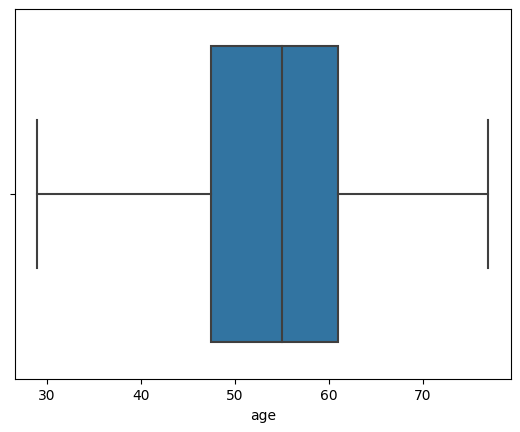

In [10]:
sns.boxplot('age',data=data)

<AxesSubplot:xlabel='slope'>

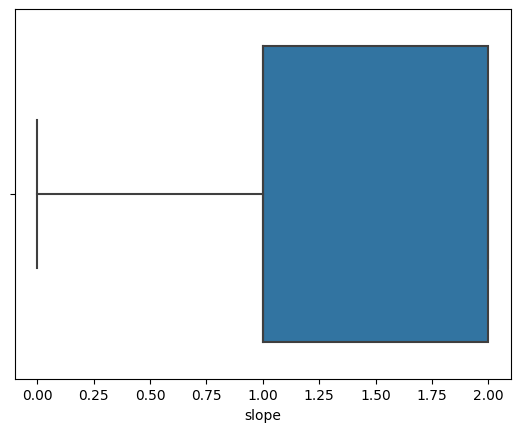

In [11]:
sns.boxplot('slope',data=data)

<AxesSubplot:xlabel='chol'>

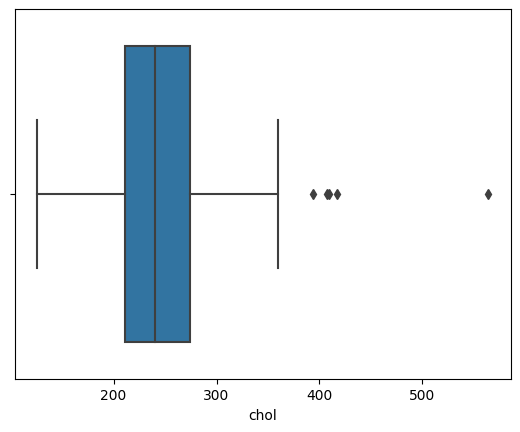

In [12]:
sns.boxplot('chol',data=data)

<AxesSubplot:xlabel='ca'>

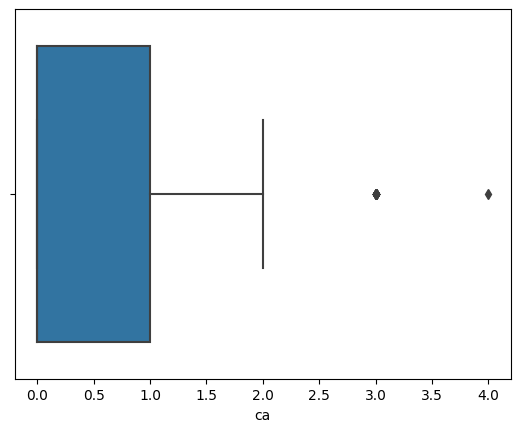

In [13]:
sns.boxplot('ca',data=data)

<AxesSubplot:xlabel='tresbps'>

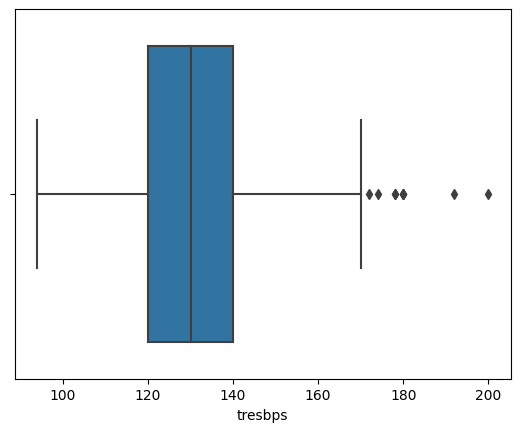

In [14]:
sns.boxplot('tresbps',data=data)

<AxesSubplot:xlabel='restecg'>

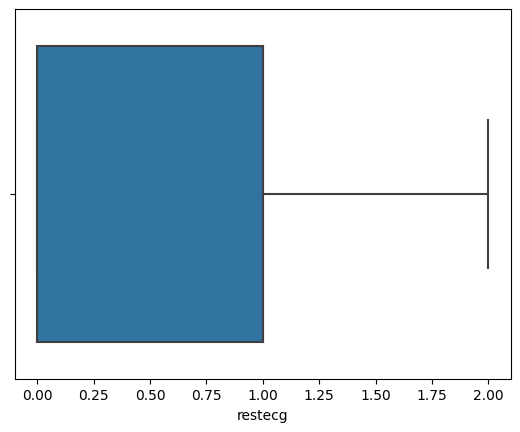

In [15]:
sns.boxplot('restecg',data=data)

<AxesSubplot:xlabel='thalach'>

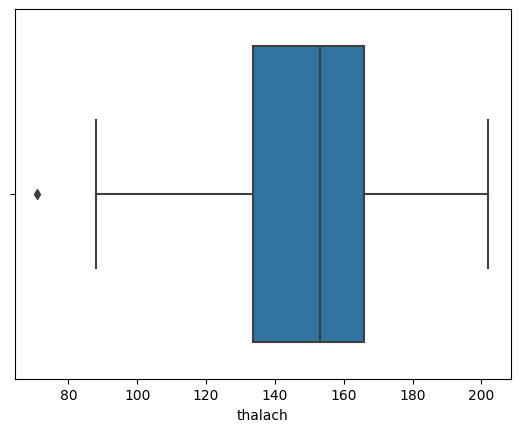

In [16]:
sns.boxplot('thalach',data=data)

<AxesSubplot:xlabel='exang'>

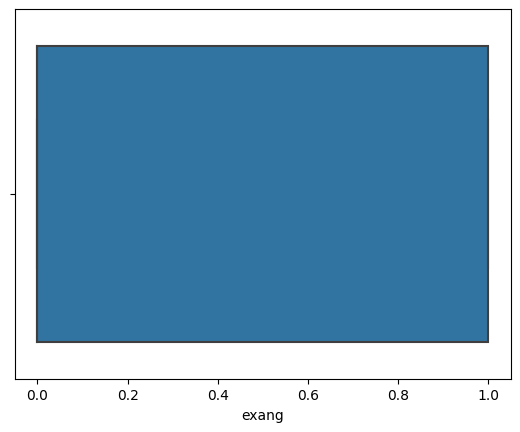

In [17]:
sns.boxplot('exang',data=data)

<AxesSubplot:xlabel='oldpeak'>

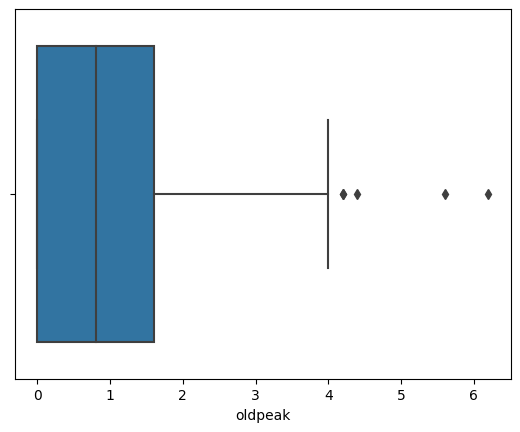

In [18]:
sns.boxplot('oldpeak',data=data)

<AxesSubplot:xlabel='thal'>

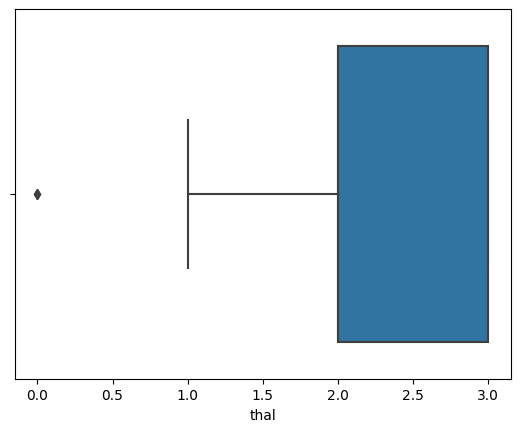

In [19]:
sns.boxplot('thal',data=data)

<AxesSubplot:xlabel='fbs'>

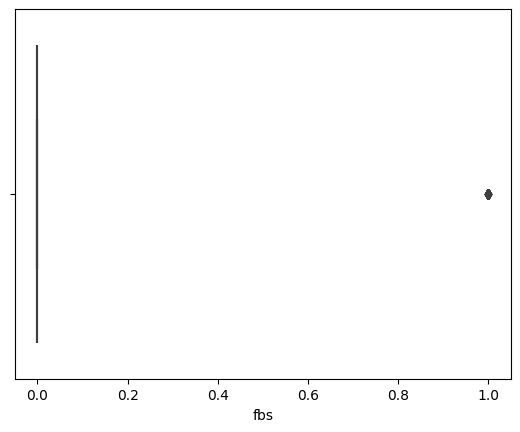

In [20]:
sns.boxplot('fbs',data=data)

array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'sex'}>,
        <AxesSubplot:title={'center':'cp'}>],
       [<AxesSubplot:title={'center':'tresbps'}>,
        <AxesSubplot:title={'center':'chol'}>,
        <AxesSubplot:title={'center':'fbs'}>],
       [<AxesSubplot:title={'center':'restecg'}>,
        <AxesSubplot:title={'center':'thalach'}>,
        <AxesSubplot:title={'center':'exang'}>],
       [<AxesSubplot:title={'center':'oldpeak'}>,
        <AxesSubplot:title={'center':'slope'}>,
        <AxesSubplot:title={'center':'ca'}>],
       [<AxesSubplot:title={'center':'thal'}>,
        <AxesSubplot:title={'center':'output'}>, <AxesSubplot:>]],
      dtype=object)

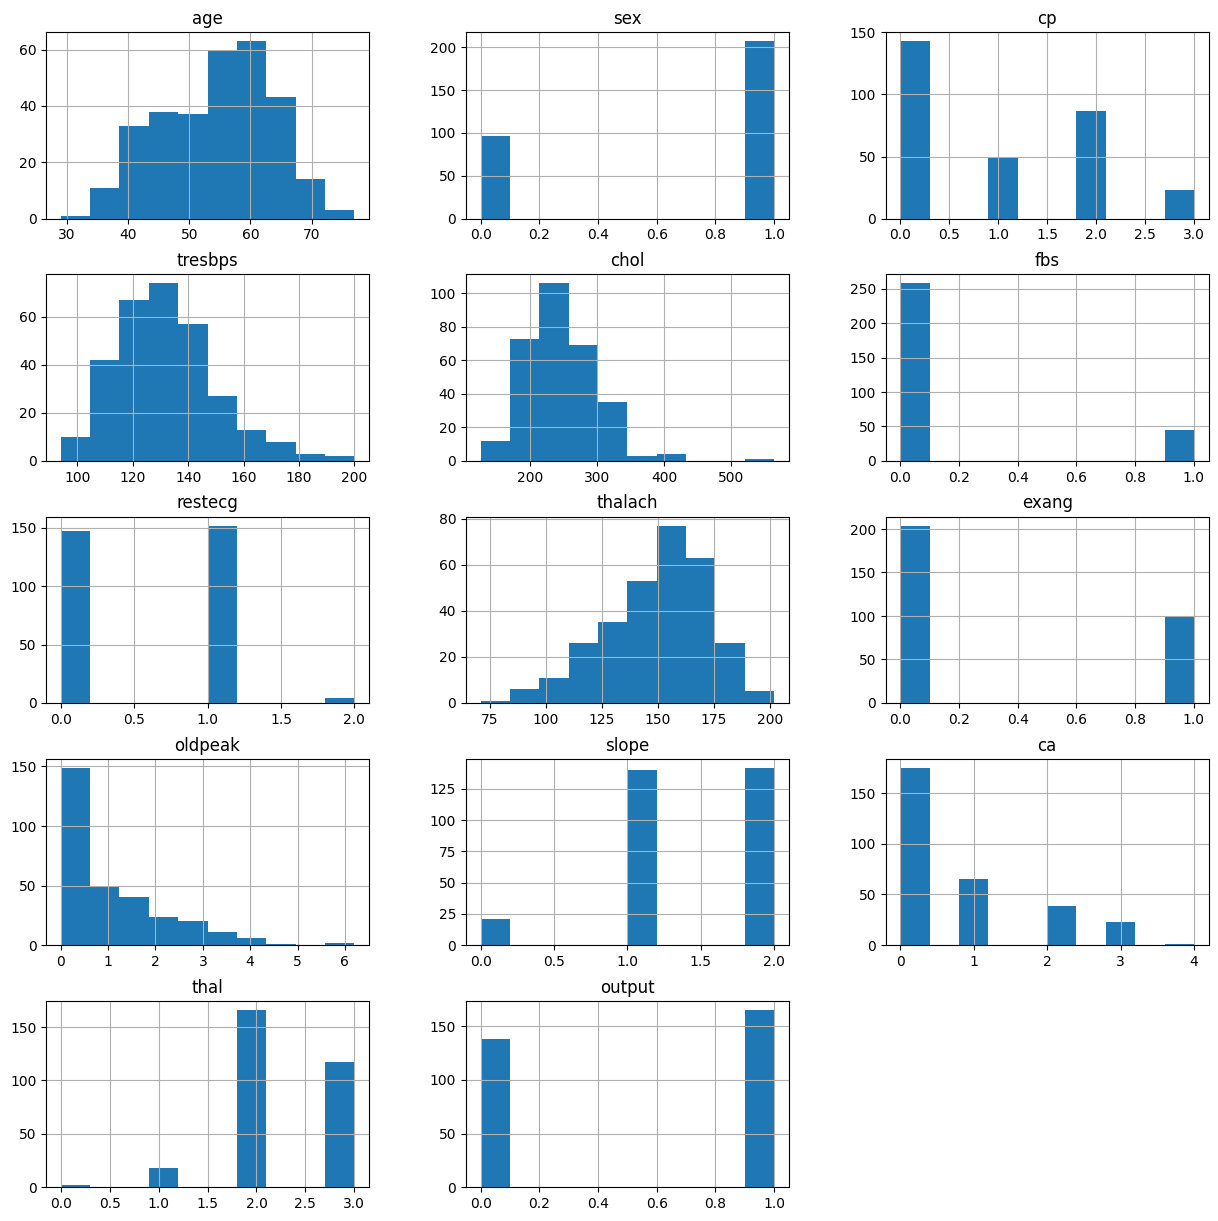

In [21]:
data.hist(figsize=(15,15),layout=(5,3))

<AxesSubplot:xlabel='fbs', ylabel='count'>

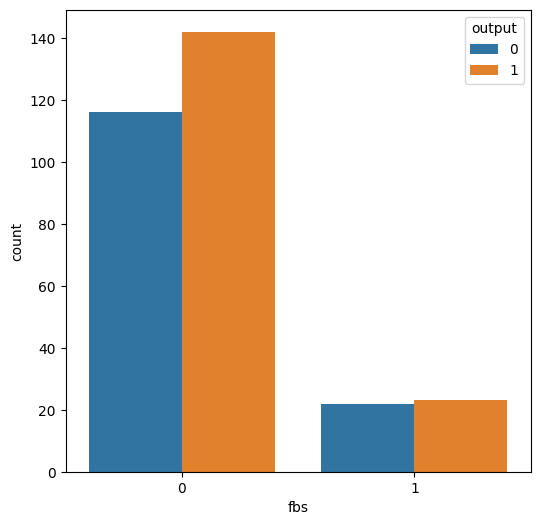

In [22]:
plt.figure(figsize=(6,6))
sns.countplot('fbs',data=data,hue='output')

<AxesSubplot:xlabel='exang', ylabel='thalach'>

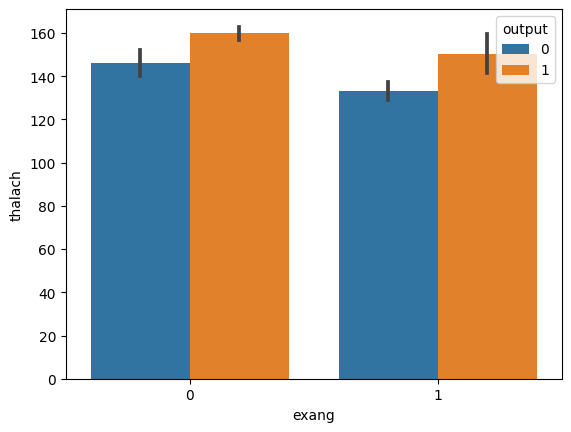

In [23]:
sns.barplot('exang','thalach',hue='output',data=data)

<AxesSubplot:xlabel='sex', ylabel='count'>

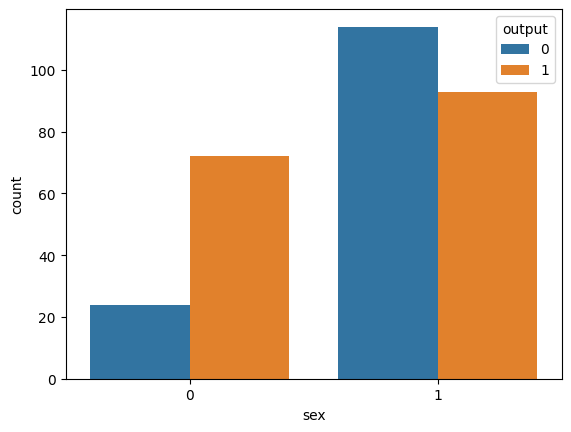

In [24]:
sns.countplot(x='sex',hue='output',data=data)

<AxesSubplot:xlabel='age', ylabel='count'>

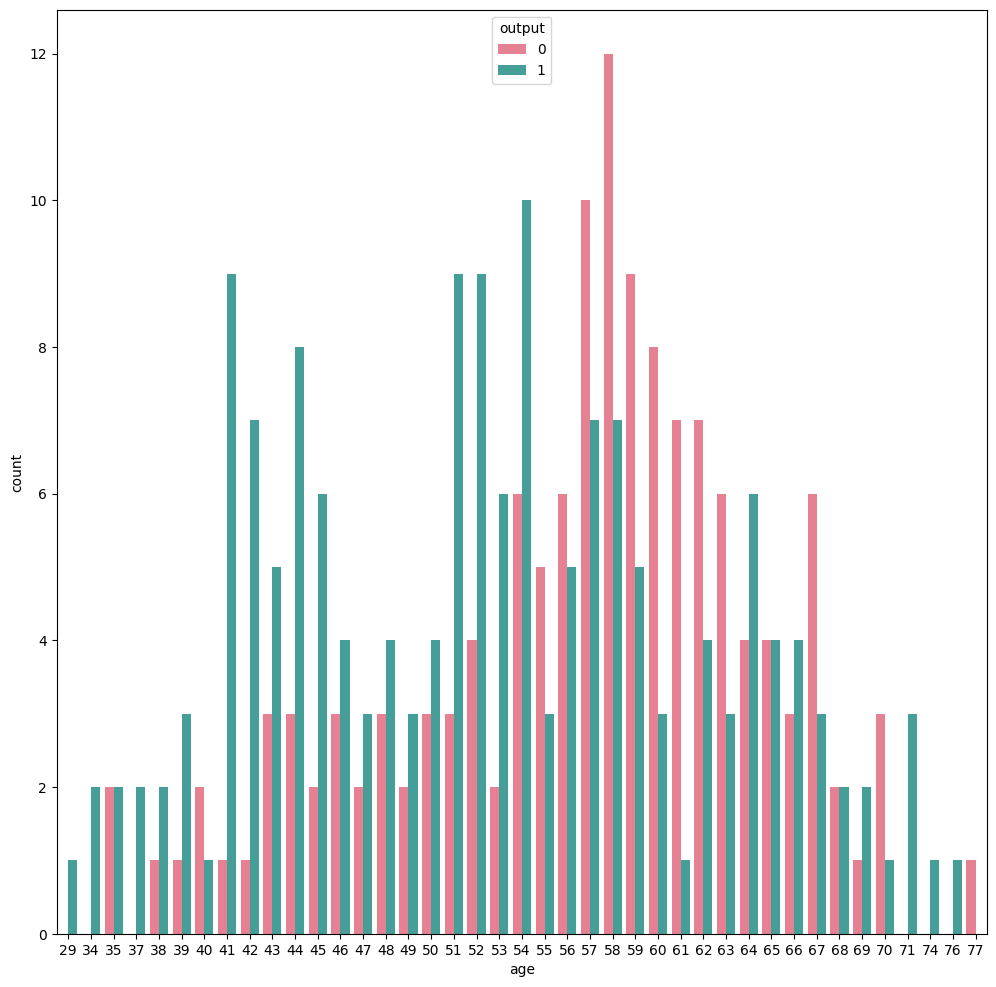

In [25]:
plt.figure(figsize=(12,12))
sns.countplot( x='age',hue='output',data=data,palette='husl')



<AxesSubplot:>

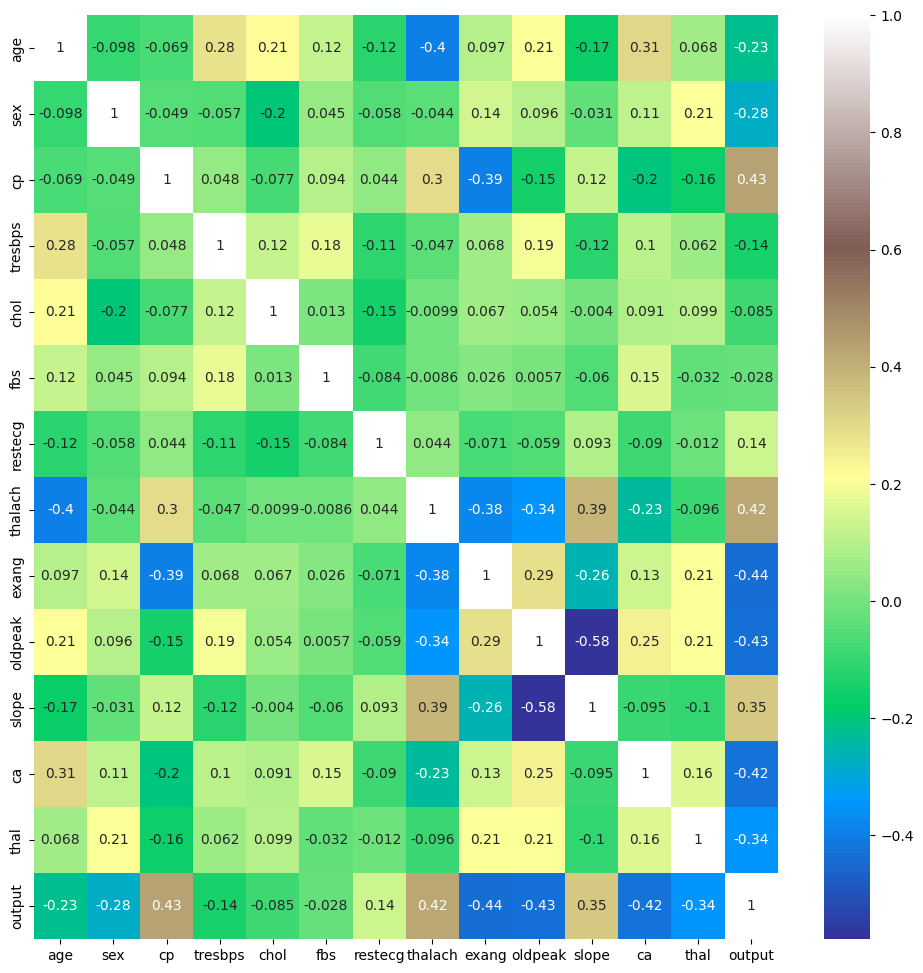

In [26]:
plt.figure(figsize=(12,12))
sns.heatmap(data.corr(),annot=True,cmap='terrain')

<AxesSubplot:xlabel='sex', ylabel='age'>

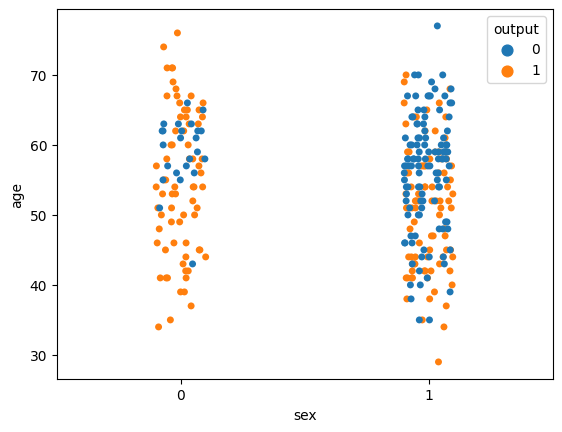

In [27]:
sns.stripplot(x='sex',y='age',hue='output',data=data)


# data Splitting 

In [28]:
#independent Variables
x=data.iloc[:,:-1].values
#Dependent Variables
y=data.iloc[:,-1].values



In [29]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.10,random_state=40)
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

## Decision Tree Model

              precision    recall  f1-score   support

           0       0.69      0.60      0.64        15
           1       0.67      0.75      0.71        16

    accuracy                           0.68        31
   macro avg       0.68      0.68      0.67        31
weighted avg       0.68      0.68      0.68        31



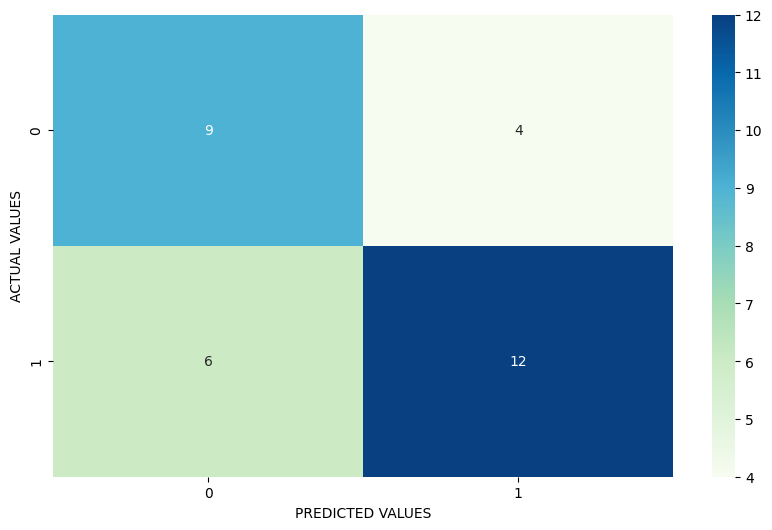

In [30]:
dt=DecisionTreeClassifier()
s=dt.fit(x_train,y_train)
dt_ac_1=dt.score(x_test,y_test)
y_pred_dt=dt.predict(x_test)
print(classification_report(y_pred_dt,y_test))
plt.figure(figsize=(10,6))
fx=sns.heatmap(confusion_matrix(y_test, y_pred_dt),annot=True,fmt='.0f',cmap='GnBu')
fx.set_xlabel('PREDICTED VALUES')
fx.set_ylabel('ACTUAL VALUES')
plt.show()

## Random Forest Algorithm

              precision    recall  f1-score   support

           0       0.62      0.89      0.73         9
           1       0.94      0.77      0.85        22

    accuracy                           0.81        31
   macro avg       0.78      0.83      0.79        31
weighted avg       0.85      0.81      0.81        31



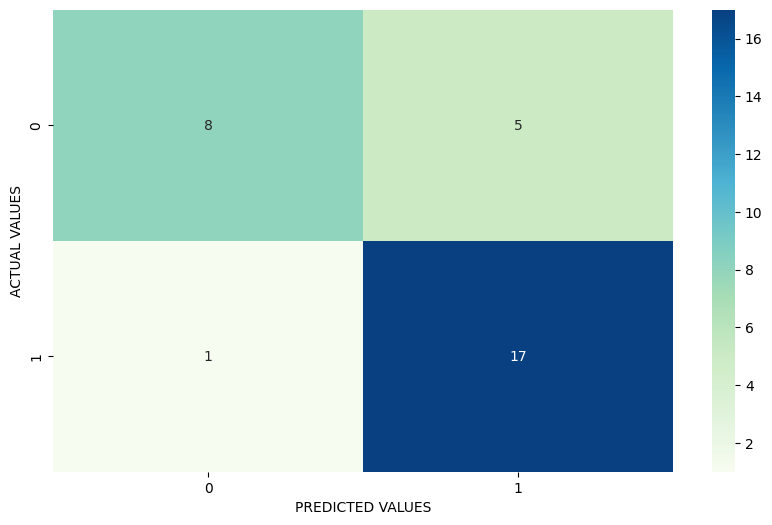

In [31]:
rf=RandomForestClassifier(n_estimators=100)
rf.fit(x_train,y_train)
rf_ac_1=rf.score(x_test,y_test)
y_pred_rf=rf.predict(x_test)
print(classification_report(y_pred_rf,y_test))
plt.figure(figsize=(10,6))
fx=sns.heatmap(confusion_matrix(y_test, y_pred_rf),annot=True,fmt='.0f',cmap='GnBu')
fx.set_xlabel('PREDICTED VALUES')
fx.set_ylabel('ACTUAL VALUES')
plt.show()

## Feed Forward Neural Network

In [32]:
model=Sequential()
model.add(Dense(124,activation='relu',input_shape=(x.shape[1],)))
model.add(Dense(128,activation='relu'))
model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(16,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 124)               1736      
                                                                 
 dense_1 (Dense)             (None, 128)               16000     
                                                                 
 flatten (Flatten)           (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 flatten_1 (Flatten)         (None, 64)                0         
                                                                 
 dense_3 (Dense)             (None, 64)                4160      
                                                                 
 dense_4 (Dense)             (None, 64)                4

In [33]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
his=model.fit(x_train,y_train,epochs=120,batch_size=32,validation_data=(x_test, y_test))
ann_pred=model.predict(x_test)
ann_pred=(ann_pred>=0.5).astype(int)

Epoch 1/120
9/9 [==============================] - 2s 31ms/step - loss: 0.6850 - accuracy: 0.6103 - val_loss: 0.6622 - val_accuracy: 0.7419
Epoch 2/120
9/9 [==============================] - 0s 5ms/step - loss: 0.6182 - accuracy: 0.7831 - val_loss: 0.5414 - val_accuracy: 0.7419
Epoch 3/120
9/9 [==============================] - 0s 5ms/step - loss: 0.4675 - accuracy: 0.8272 - val_loss: 0.4234 - val_accuracy: 0.7419
Epoch 4/120
9/9 [==============================] - 0s 15ms/step - loss: 0.3753 - accuracy: 0.8346 - val_loss: 0.3982 - val_accuracy: 0.8387
Epoch 5/120
9/9 [==============================] - 0s 6ms/step - loss: 0.3280 - accuracy: 0.8824 - val_loss: 0.3498 - val_accuracy: 0.8387
Epoch 6/120
9/9 [==============================] - 0s 5ms/step - loss: 0.2801 - accuracy: 0.9081 - val_loss: 0.4249 - val_accuracy: 0.8387
Epoch 7/120
9/9 [==============================] - 0s 7ms/step - loss: 0.2201 - accuracy: 0.9338 - val_loss: 0.3526 - val_accuracy: 0.8387
Epoch 8/120
9/9 [========

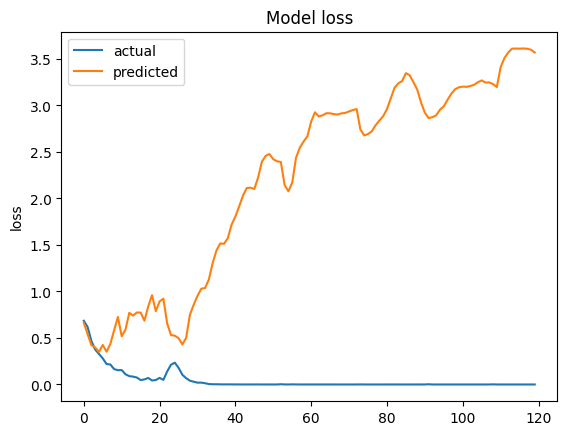

In [34]:
plt.plot(his.history['loss'])
plt.plot(his.history['val_loss'])
plt.legend(['actual','predicted'])
plt.title('Model loss')
plt.ylabel('loss')
plt.show()

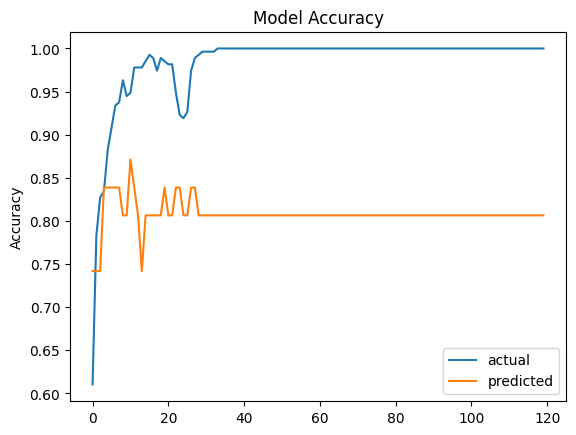

In [35]:
plt.plot(his.history['accuracy'])
plt.plot(his.history['val_accuracy'])
plt.legend(['actual','predicted'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.show()

              precision    recall  f1-score   support

           0       0.62      0.89      0.73         9
           1       0.94      0.77      0.85        22

    accuracy                           0.81        31
   macro avg       0.78      0.83      0.79        31
weighted avg       0.85      0.81      0.81        31



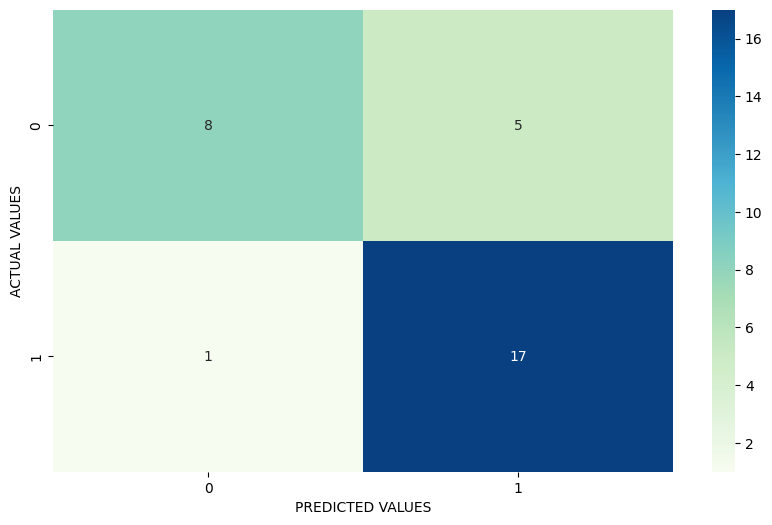

In [36]:
print(classification_report(ann_pred,y_test))
plt.figure(figsize=(10,6))
fx=sns.heatmap(confusion_matrix(y_test, ann_pred),annot=True,fmt='.0f',cmap='GnBu')
fx.set_xlabel('PREDICTED VALUES')
fx.set_ylabel('ACTUAL VALUES')
plt.show()

## RNN Neural Network

In [37]:
x_train=x_train.reshape(x_train.shape[0],x_train.shape[1],1)
x_test=x_test.reshape(x_test.shape[0],x_test.shape[1],1)

In [38]:
rnn_model=Sequential()
rnn_model.add(SimpleRNN(128,input_shape=(x_train.shape[1],x_train.shape[2])))
rnn_model.add(Dense(64,activation='relu'))
rnn_model.add(Flatten())
rnn_model.add(Dense(64,activation='relu'))
rnn_model.add(Flatten())
rnn_model.add(Dense(64,activation='relu'))
rnn_model.add(Dense(32,activation='relu'))
rnn_model.add(Dense(64,activation='relu'))
rnn_model.add(Dense(64,activation='relu'))
rnn_model.add(Dense(32,activation='relu'))
rnn_model.add(Dense(64,activation='relu'))
rnn_model.add(Dense(32,activation='relu'))
rnn_model.add(Dense(32,activation='relu'))
rnn_model.add(Dropout(0.2))
rnn_model.add(Dense(1, activation='sigmoid'))
rnn_model.summary()
rnn_model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
his=rnn_model.fit(x_train,y_train,epochs=120,batch_size=64,validation_data=(x_test, y_test))
y_pred=rnn_model.predict(x_test)
y_pred=(y_pred>=0.5).astype(int)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 128)               16640     
                                                                 
 dense_10 (Dense)            (None, 64)                8256      
                                                                 
 flatten_2 (Flatten)         (None, 64)                0         
                                                                 
 dense_11 (Dense)            (None, 64)                4160      
                                                                 
 flatten_3 (Flatten)         (None, 64)                0         
                                                                 
 dense_12 (Dense)            (None, 64)                4160      
                                                                 
 dense_13 (Dense)            (None, 32)               

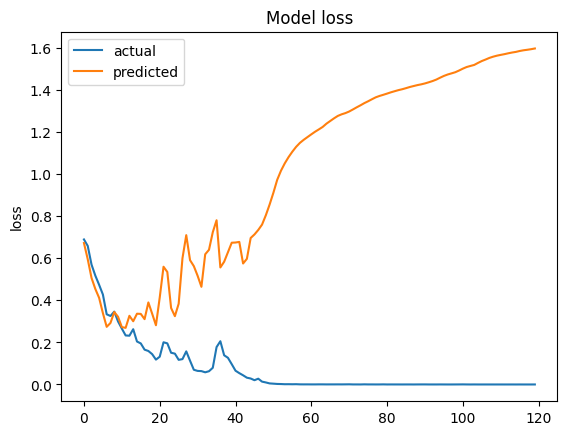

In [39]:
plt.plot(his.history['loss'])
plt.plot(his.history['val_loss'])
plt.legend(['actual','predicted'])
plt.title('Model loss')
plt.ylabel('loss')
plt.show()

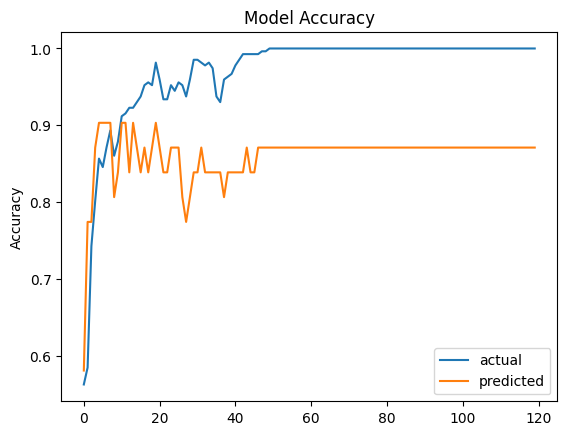

In [40]:
plt.plot(his.history['accuracy'])
plt.plot(his.history['val_accuracy'])
plt.legend(['actual','predicted'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.show()

              precision    recall  f1-score   support

           0       0.69      1.00      0.82         9
           1       1.00      0.82      0.90        22

    accuracy                           0.87        31
   macro avg       0.85      0.91      0.86        31
weighted avg       0.91      0.87      0.88        31



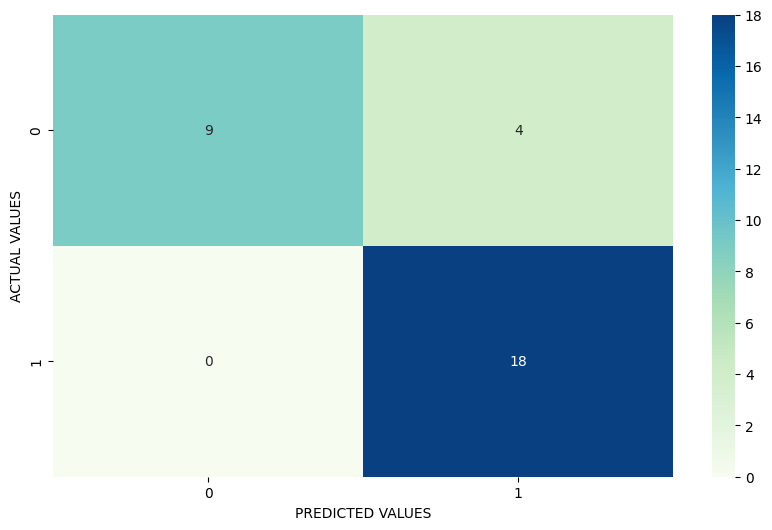

In [41]:
print(classification_report(y_pred,y_test))
plt.figure(figsize=(10,6))
fx=sns.heatmap(confusion_matrix(y_test, y_pred),annot=True,fmt='.0f',cmap='GnBu')
fx.set_xlabel('PREDICTED VALUES')
fx.set_ylabel('ACTUAL VALUES')
plt.show()

In [42]:
# import  pickle
# with open ('model.pkl','wb') as f:
#     pickle.dump(rnn_model,f)